In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/sample_data/Raw_Males_VF_Dataset.csv')
data.head(10)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24
7,B0018,M,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,NaN,0.23
8,B0019,M,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,NaN,0.22
9,B0020,M,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,NaN,0.18


<ipython-input-2-ee4303c44fd6>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
<ipython-input-2-ee4303c44fd6>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
<ipython-input-2-ee4303c44fd6>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only t

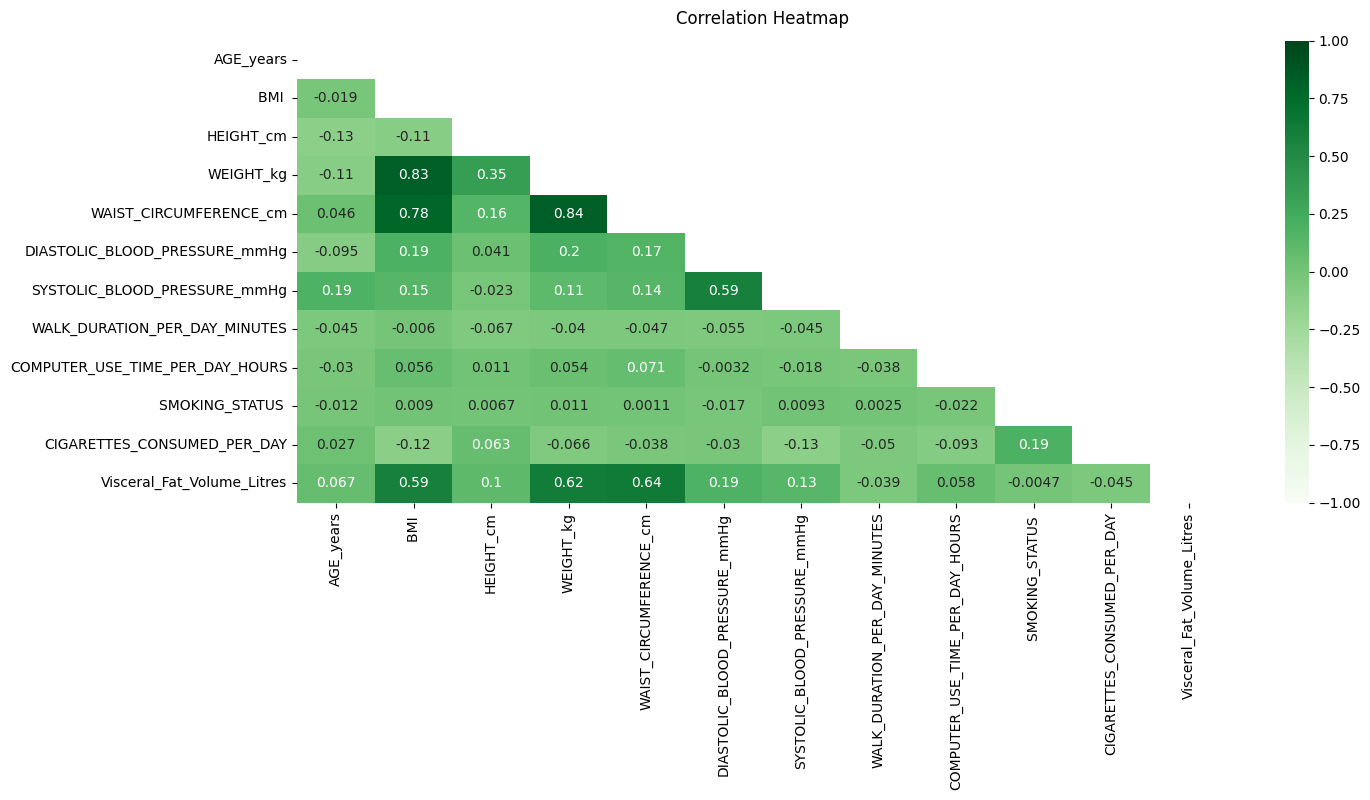

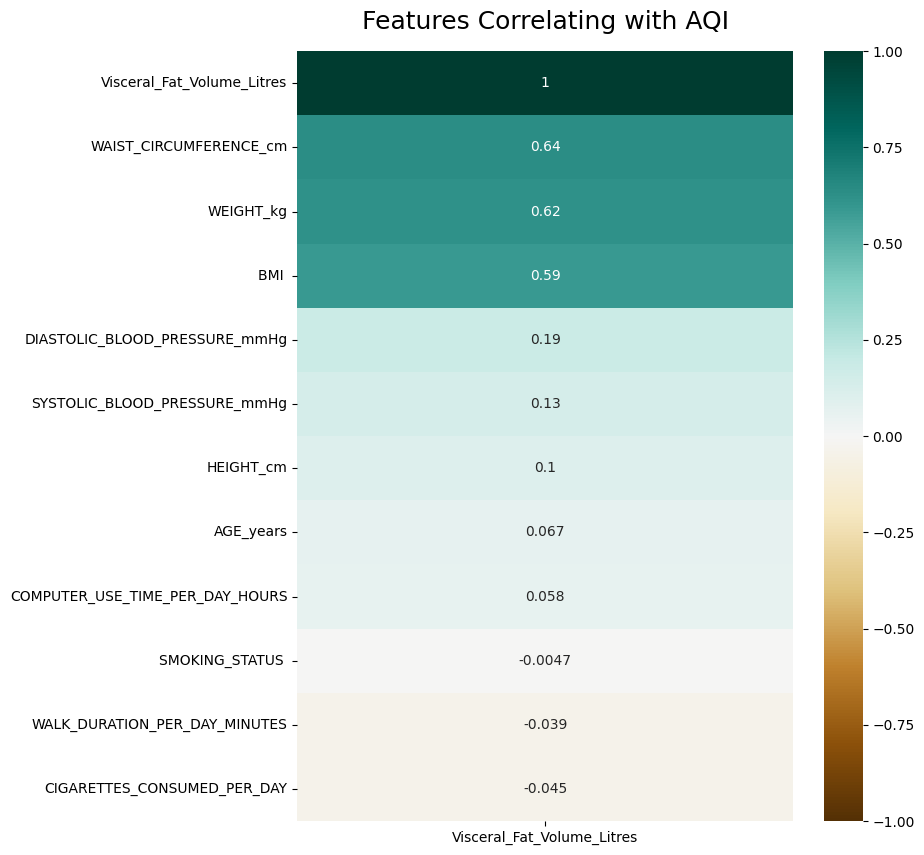

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

Heatmap= sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="Greens");
Heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')




plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(data.corr()[['Visceral_Fat_Volume_Litres']].sort_values(by='Visceral_Fat_Volume_Litres', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with AQI', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


In [ ]:
list(data.columns)

['SUBJECT_ID',
 'SEX',
 'AGE_years',
 'BMI ',
 'HEIGHT_cm',
 'WEIGHT_kg',
 'WAIST_CIRCUMFERENCE_cm',
 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
 'WALK_DURATION_PER_DAY_MINUTES',
 'COMPUTER_USE_TIME_PER_DAY_HOURS',
 'SMOKING_STATUS ',
 'DISCONTINUED_NO_',
 'CIGARETTES_CONSUMED_PER_DAY',
 'Visceral_Fat_Volume_Litres']

In [ ]:
#Removing the space for Smoking Status and BMI column from the dataset
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['SUBJECT_ID', 'SEX', 'AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg',
       'WAIST_CIRCUMFERENCE_cm', 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
       'SYSTOLIC_BLOOD_PRESSURE_mmHg', 'WALK_DURATION_PER_DAY_MINUTES',
       'COMPUTER_USE_TIME_PER_DAY_HOURS', 'SMOKING_STATUS', 'DISCONTINUED_NO_',
       'CIGARETTES_CONSUMED_PER_DAY', 'Visceral_Fat_Volume_Litres'],
      dtype='object')

In [ ]:
#Finding the records of age greater than 120
data.loc[data['AGE_years']>120]


,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
1306,B1317,M,190,32,161.0,78.56,104,82,135.0,57,3,0.0,NaN,NaN,5.09


In [ ]:
#Dropping the record with Age=190
data.drop(data[data['AGE_years']>120].index,inplace=True)
data[data['SUBJECT_ID'].isin(['B1317'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres


In [ ]:
data.loc[data['SYSTOLIC_BLOOD_PRESSURE_mmHg'].isna()]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
127,B0138,M,63,26,182.0,82.65,95,116,NaN,65,0,0.0,NaN,NaN,1.34
1084,B1095,M,62,28,185.0,91.19,97,116,NaN,77,4,0.0,NaN,NaN,4.57
2291,B2302,M,77,31,181.0,90.32,98,104,NaN,31,9,0.0,NaN,NaN,7.66
2734,B2745,M,57,29,181.0,89.24,98,115,NaN,97,0,0.0,NaN,NaN,10.36
2833,B2844,M,62,40,179.0,119.38,122,118,NaN,79,12,0.0,NaN,NaN,12.53


In [ ]:
#Replacing the empty systolic bp records with mean()
data[['SYSTOLIC_BLOOD_PRESSURE_mmHg']] = data[['SYSTOLIC_BLOOD_PRESSURE_mmHg']].fillna(data['SYSTOLIC_BLOOD_PRESSURE_mmHg'].mean())
#Checking the SYSTOLIC_BLOOD_PRESSURE_mmHg variable
data[data['SUBJECT_ID'].isin(['B0138','B1095','B2302','B2745','B2844'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
127,B0138,M,63,26,182.0,82.65,95,116,133.769769,65,0,0.0,NaN,NaN,1.34
1084,B1095,M,62,28,185.0,91.19,97,116,133.769769,77,4,0.0,NaN,NaN,4.57
2291,B2302,M,77,31,181.0,90.32,98,104,133.769769,31,9,0.0,NaN,NaN,7.66
2734,B2745,M,57,29,181.0,89.24,98,115,133.769769,97,0,0.0,NaN,NaN,10.36
2833,B2844,M,62,40,179.0,119.38,122,118,133.769769,79,12,0.0,NaN,NaN,12.53


In [ ]:
#Checking height less than 1.5 feet
data[data.HEIGHT_cm<50]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39


In [ ]:
#Checking the count of height column
data['HEIGHT_cm'].count()

2863

In [ ]:
#Drop the observations where height is less than 1.5 feet
data.drop(data[data.HEIGHT_cm<50].index,inplace=True)
data[data['SUBJECT_ID'].isin(['B0014','B0015'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres


In [ ]:
#Checking the count of height column after dropping the records
data['HEIGHT_cm'].count()

2861

In [ ]:
#Checking the computer use time per day hours greater than 24
data[data.COMPUTER_USE_TIME_PER_DAY_HOURS>24]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
317,B0328,M,49,29,176.5,81.59,87,71,103.0,65,30,0.0,NaN,NaN,2.50
326,B0337,M,48,24,187.0,74.07,82,75,100.0,67,32,0.0,NaN,NaN,2.53
715,B0726,M,50,26,189.0,83.29,88,72,119.0,48,27,0.0,NaN,NaN,3.68
1126,B1137,M,51,27,182.0,78.61,90,99,133.0,61,30,0.0,NaN,11.0,4.69
1180,B1191,M,69,26,179.0,75.62,94,84,121.0,102,69,0.0,NaN,NaN,4.81
1249,B1260,M,69,31,183.0,92.96,103,85,146.0,86,35,0.0,NaN,NaN,4.98
1338,B1349,M,53,25,182.0,78.17,92,98,116.0,91,25,0.0,NaN,NaN,5.15
1587,B1598,M,48,31,200.0,117.11,104,85,121.0,68,46,0.0,NaN,NaN,5.76
2326,B2337,M,47,33,186.0,102.39,108,108,133.0,80,32,0.0,NaN,NaN,7.79
2606,B2617,M,57,29,198.0,103.16,106,105,178.0,11,25,0.0,NaN,NaN,9.18


In [ ]:
#check the count for computer hours per day column
data['COMPUTER_USE_TIME_PER_DAY_HOURS'].count()

2861

In [ ]:
#Dropping the records which has computer usage more than 24 hours a day
data.drop(data[data.COMPUTER_USE_TIME_PER_DAY_HOURS>24].index,inplace=True)
data[data['SUBJECT_ID'].isin(['B0328','B0337','B0726','B1137','B1191','B1260','B1349','B1598','B2337','B2617','B2631','B2819'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres


In [ ]:
#check the count for computer hours per day column after dropping
data['COMPUTER_USE_TIME_PER_DAY_HOURS'].count()

2849

In [ ]:
#checking the null values for CIGARETTES_CONSUMED_PER_DAY column
data.loc[data['CIGARETTES_CONSUMED_PER_DAY'].isna()]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,B2870,M,69,41,184.0,130.23,125,94,123.0,44,16,0.0,NaN,NaN,14.82
2860,B2871,M,63,32,189.0,110.83,107,94,108.0,46,6,0.0,NaN,NaN,14.91
2861,B2872,M,61,35,180.0,110.32,114,89,130.0,41,5,0.0,NaN,NaN,15.19
2862,B2873,M,75,48,189.0,159.52,127,116,159.0,25,3,0.0,NaN,NaN,16.05


In [ ]:
#Replacing cigarettes consumed to 0 for all non smokers
data['CIGARETTES_CONSUMED_PER_DAY']=data['CIGARETTES_CONSUMED_PER_DAY'].fillna(0)
data.loc[data['CIGARETTES_CONSUMED_PER_DAY']==0]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,0.0,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,0.0,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,0.0,0.59
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,0.0,0.27
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,0.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,B2870,M,69,41,184.0,130.23,125,94,123.0,44,16,0.0,NaN,0.0,14.82
2860,B2871,M,63,32,189.0,110.83,107,94,108.0,46,6,0.0,NaN,0.0,14.91
2861,B2872,M,61,35,180.0,110.32,114,89,130.0,41,5,0.0,NaN,0.0,15.19
2862,B2873,M,75,48,189.0,159.52,127,116,159.0,25,3,0.0,NaN,0.0,16.05


In [ ]:
#checking if any non smokers are given status as smokers
data[((data['SMOKING_STATUS']==1) | (data['SMOKING_STATUS'].isna())) & (data['CIGARETTES_CONSUMED_PER_DAY']==0)]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres


In [ ]:
#checking if any smokers are given status as non smokers
data[((data['SMOKING_STATUS']==0) | (data['SMOKING_STATUS'].isna())) & (data['CIGARETTES_CONSUMED_PER_DAY']>0)]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
247,B0258,M,75,26,184.0,78.83,92,98,162.0,29,7,NaN,NaN,8.0,2.18
441,B0452,M,57,26,179.0,77.06,95,80,154.0,99,5,NaN,NaN,2.0,2.93
476,B0487,M,55,25,185.0,80.11,92,94,164.0,68,2,0.0,NaN,17.0,3.04
543,B0554,M,60,24,182.0,75.65,87,93,136.0,103,2,0.0,NaN,9.0,3.26
716,B0727,M,50,29,183.0,90.32,97,94,123.0,87,7,0.0,NaN,13.0,3.68
1171,B1182,M,67,31,179.0,93.52,106,94,134.0,46,0,0.0,NaN,12.0,4.79
1178,B1189,M,49,30,177.0,84.51,88,77,98.0,140,2,0.0,NaN,8.0,4.81
1185,B1196,M,69,26,187.0,86.83,97,107,180.0,101,2,0.0,NaN,45.0,4.82
1511,B1522,M,53,31,185.0,98.76,93,96,130.0,52,3,0.0,NaN,13.0,5.56
1801,B1812,M,51,34,188.0,111.19,111,69,103.0,15,8,0.0,NaN,5.0,6.26


In [ ]:
#Setting the smoking status to 1 for smokers
data.loc[((data['SMOKING_STATUS']==0) | (data['SMOKING_STATUS'].isna())) & (data['CIGARETTES_CONSUMED_PER_DAY']>0),'SMOKING_STATUS']=1
data[data['SUBJECT_ID'].isin(['B0258','B0452','B0487','B0554','B0727','B1137','B1182','B1189','B1196','B1522','B1812','B2375','B2553'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
247,B0258,M,75,26,184.0,78.83,92,98,162.0,29,7,1.0,NaN,8.0,2.18
441,B0452,M,57,26,179.0,77.06,95,80,154.0,99,5,1.0,NaN,2.0,2.93
476,B0487,M,55,25,185.0,80.11,92,94,164.0,68,2,1.0,NaN,17.0,3.04
543,B0554,M,60,24,182.0,75.65,87,93,136.0,103,2,1.0,NaN,9.0,3.26
716,B0727,M,50,29,183.0,90.32,97,94,123.0,87,7,1.0,NaN,13.0,3.68
1171,B1182,M,67,31,179.0,93.52,106,94,134.0,46,0,1.0,NaN,12.0,4.79
1178,B1189,M,49,30,177.0,84.51,88,77,98.0,140,2,1.0,NaN,8.0,4.81
1185,B1196,M,69,26,187.0,86.83,97,107,180.0,101,2,1.0,NaN,45.0,4.82
1511,B1522,M,53,31,185.0,98.76,93,96,130.0,52,3,1.0,NaN,13.0,5.56
1801,B1812,M,51,34,188.0,111.19,111,69,103.0,15,8,1.0,NaN,5.0,6.26


In [ ]:
#Finding the negative visceral fat values
data[data['Visceral_Fat_Volume_Litres']<0]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,0.0,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,0.0,-0.59


In [ ]:
#Replacing negative visceral fat values with 0
data.loc[data['Visceral_Fat_Volume_Litres']<0,'Visceral_Fat_Volume_Litres']=0
data[data['SUBJECT_ID'].isin(['B0011','B0012'])]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,0.0,0.0
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,0.0,0.0


In [ ]:
import numpy as np
data['Risk_Level'] = np.where(
     data['Visceral_Fat_Volume_Litres'].between(0, 3, inclusive=True),
    'Low Risk',
     np.where(
        data['Visceral_Fat_Volume_Litres'].between(3.01, 6, inclusive=True), 'Moderate Risk', 'High Risk'
     )
)
data.head()

<ipython-input-11-ded643c2034e>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['Visceral_Fat_Volume_Litres'].between(0, 3, inclusive=True),
<ipython-input-11-ded643c2034e>:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['Visceral_Fat_Volume_Litres'].between(3.01, 6, inclusive=True), 'Moderate Risk', 'High Risk'


,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,0.0,0.00,Low Risk
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,0.0,0.00,Low Risk
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,0.0,0.59,Low Risk
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,0.0,0.27,Low Risk
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,0.0,0.24,Low Risk


In [ ]:
len(data.columns)

16

In [ ]:
#Drop input columns that does not impact for target prediction
data.drop(labels=['SUBJECT_ID','SEX','DISCONTINUED_NO_','Visceral_Fat_Volume_Litres'],axis=1,inplace=True)
data.head(10)
#data.isna().sum()
#data.isna().sum()/len(data)*100

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Risk_Level
0,47,46,187.0,152.24,154,133,178.0,52,7,0.0,0.0,Low Risk
1,52,54,182.0,167.36,139,111,187.0,50,3,0.0,0.0,Low Risk
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.0,Low Risk
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.0,Low Risk
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.0,Low Risk
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0.0,Low Risk
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0.0,Low Risk
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0.0,Low Risk
10,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0.0,Low Risk
11,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0.0,Low Risk


In [ ]:
len(data.columns)

12

In [ ]:
#Statistical description of dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2849.0,62.316251,8.155659,41.00,57.00,63.00,69.00,80.00
BMI,2849.0,29.288522,3.888944,20.00,27.00,29.00,31.00,54.00
HEIGHT_cm,2849.0,183.050369,7.211193,155.00,178.00,183.00,188.00,210.00
WEIGHT_kg,2849.0,91.359905,13.665703,55.41,81.93,89.74,98.73,168.77
WAIST_CIRCUMFERENCE_cm,2849.0,99.063531,10.129005,70.00,92.00,98.00,105.00,154.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2849.0,91.619516,10.621878,48.00,84.00,91.00,99.00,133.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2849.0,133.820937,16.782313,90.00,122.00,133.00,144.00,192.00
WALK_DURATION_PER_DAY_MINUTES,2849.0,81.684451,64.853025,1.00,46.00,67.00,92.00,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2849.0,4.409266,3.928826,0.00,2.00,3.00,6.00,24.00
SMOKING_STATUS,2849.0,0.044928,0.207182,0.00,0.00,0.00,0.00,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2849 entries, 0 to 2863
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_years                        2849 non-null   int64  
 1   BMI                              2849 non-null   int64  
 2   HEIGHT_cm                        2849 non-null   float64
 3   WEIGHT_kg                        2849 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2849 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2849 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2849 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2849 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2849 non-null   int64  
 9   SMOKING_STATUS                   2849 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      2849 non-null   float64
 11  Risk_Level                       2849 non-null   object 
dtypes: float64(5), int64

In [ ]:
#create a dataframe with all training data except the target column
X= data.drop(columns=['Risk_Level'])
#check the input data after removing target
X.head()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY
0,47,46,187.0,152.24,154,133,178.0,52,7,0.0,0.0
1,52,54,182.0,167.36,139,111,187.0,50,3,0.0,0.0
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.0


In [ ]:
#separate target values
y = data['Risk_Level'].values
data.Risk_Level.value_counts()

Moderate Risk    1217
High Risk        1172
Low Risk          460
Name: Risk_Level, dtype: int64

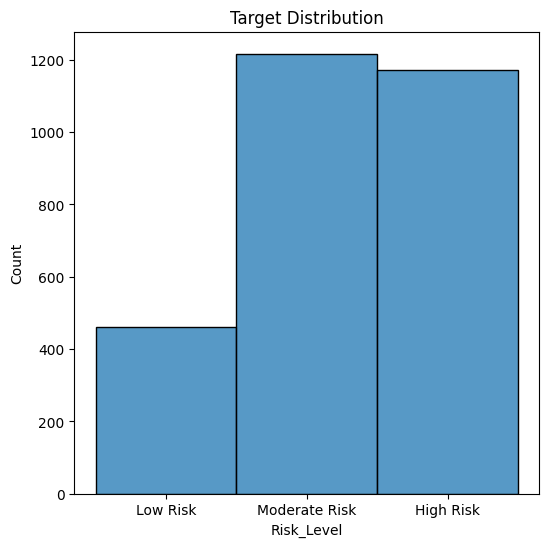

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of Class Variable
plt.figure(figsize=(6,6))
sns.histplot(data['Risk_Level'])
plt.title('Target Distribution')
plt.show()

In [ ]:
#Normalising data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Slr_X = scaler.fit_transform(X.to_numpy())
Slr_X = pd.DataFrame(Slr_X, columns=[
  'AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WALK_DURATION_PER_DAY_MINUTES',
  'COMPUTER_USE_TIME_PER_DAY_HOURS','SMOKING_STATUS','CIGARETTES_CONSUMED_PER_DAY'])
print("Scaled Dataset Using MinMaxScaler")
Slr_X.head()

Scaled Dataset Using MinMaxScaler


,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY
0,0.153846,0.764706,0.581818,0.854181,1.000000,1.000000,0.862745,0.077863,0.291667,0.0,0.0
1,0.282051,1.000000,0.490909,0.987562,0.821429,0.741176,0.950980,0.074809,0.125000,0.0,0.0
2,0.538462,0.235294,0.363636,0.242678,0.273810,0.823529,0.686275,0.087023,0.250000,0.0,0.0
3,0.743590,0.205882,0.454545,0.186662,0.297619,0.411765,0.362745,0.102290,0.208333,0.0,0.0
4,0.615385,0.029412,0.618182,0.070219,0.071429,0.529412,0.323529,0.128244,0.125000,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(Slr_X, y, test_size=0.3,stratify=y,random_state=42)


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=15,algorithm='auto',leaf_size=30,metric='euclidean',p=2,weights='distance')

# Fit the classifier to the data
knn.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_knn=knn.predict(X_test)

#Predict the probability of class for test dataset
y_pred_knn_proba=knn.predict_proba(X_test)

In [ ]:
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy score (KNN): ", knn_score)

Accuracy score (KNN):  0.6046783625730994


Text(0.5, 23.52222222222222, 'Predicted label')

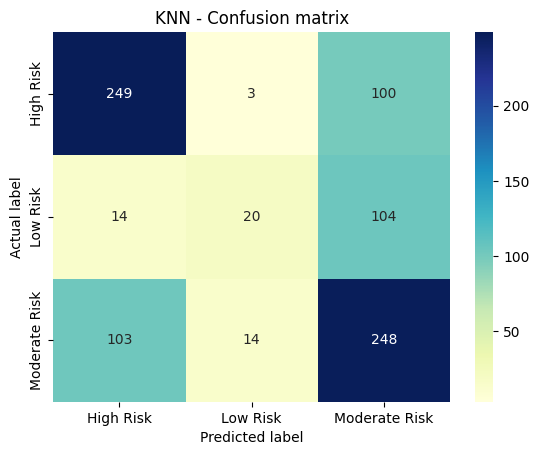

In [ ]:
#Confusion Matrix for KNN
from sklearn.metrics import confusion_matrix
cnf_knn=confusion_matrix(y_test, y_pred_knn)

#Plot KNN Confusion Matrix using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# create heatmap
sns.heatmap(pd.DataFrame(cnf_knn,index=['High Risk','Low Risk','Moderate Risk'],columns=['High Risk','Low Risk','Moderate Risk']),
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN - Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
#KNN Metrics Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))
knn_auc=roc_auc_score(y_test,y_pred_knn_proba,multi_class="ovr")
print("ROC_AUC_SCORE:",knn_auc)

               precision    recall  f1-score   support

    High Risk       0.68      0.71      0.69       352
     Low Risk       0.54      0.14      0.23       138
Moderate Risk       0.55      0.68      0.61       365

     accuracy                           0.60       855
    macro avg       0.59      0.51      0.51       855
 weighted avg       0.60      0.60      0.58       855

ROC_AUC_SCORE: 0.7506537380168673


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create GaussianNB object
nb = GaussianNB()

# Train Gaussian Naive Bayes Classifer
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_nb=nb.predict(X_test)

#Predict the probability of class for test dataset
y_pred_nb_proba=nb.predict_proba(X_test)

In [ ]:
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score
nb_score = accuracy_score(y_test, y_pred_nb)
print("Accuracy score (NB): ", nb_score)

Accuracy score (NB):  0.6339181286549708


Text(0.5, 23.52222222222222, 'Predicted label')

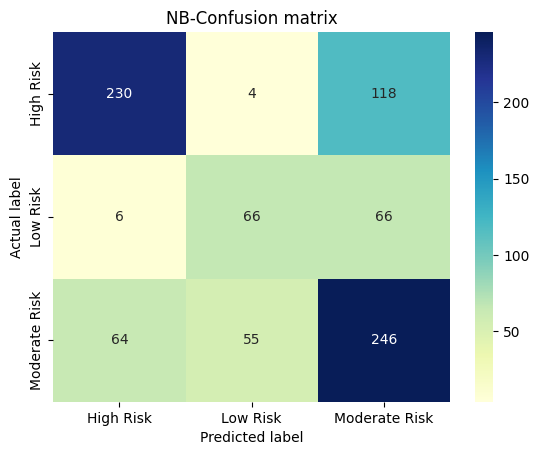

In [ ]:
#Confusion Matrix for NB
cnf_nb=confusion_matrix(y_test, y_pred_nb)

# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
# create heatmap
sns.heatmap(pd.DataFrame(cnf_nb,index=['High Risk','Low Risk','Moderate Risk'],columns=['High Risk','Low Risk','Moderate Risk']),
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('NB-Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Naive Bayes Metrics Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))  # nb classification report
nb_auc=roc_auc_score(y_test,y_pred_nb_proba,multi_class="ovr")
print("ROC_AUC_SCORE:",nb_auc)

               precision    recall  f1-score   support

    High Risk       0.77      0.65      0.71       352
     Low Risk       0.53      0.48      0.50       138
Moderate Risk       0.57      0.67      0.62       365

     accuracy                           0.63       855
    macro avg       0.62      0.60      0.61       855
 weighted avg       0.65      0.63      0.64       855

ROC_AUC_SCORE: 0.7903932193596632


**DECISION** **TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",splitter="best", max_depth=3, random_state=42,max_leaf_nodes=10,
                             min_samples_split=200,min_samples_leaf=30,max_features=11,min_impurity_decrease=0.001)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

#Predict the probability of class for test dataset
y_pred_dt_proba=clf.predict_proba(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))


Accuracy: 0.6280701754385964


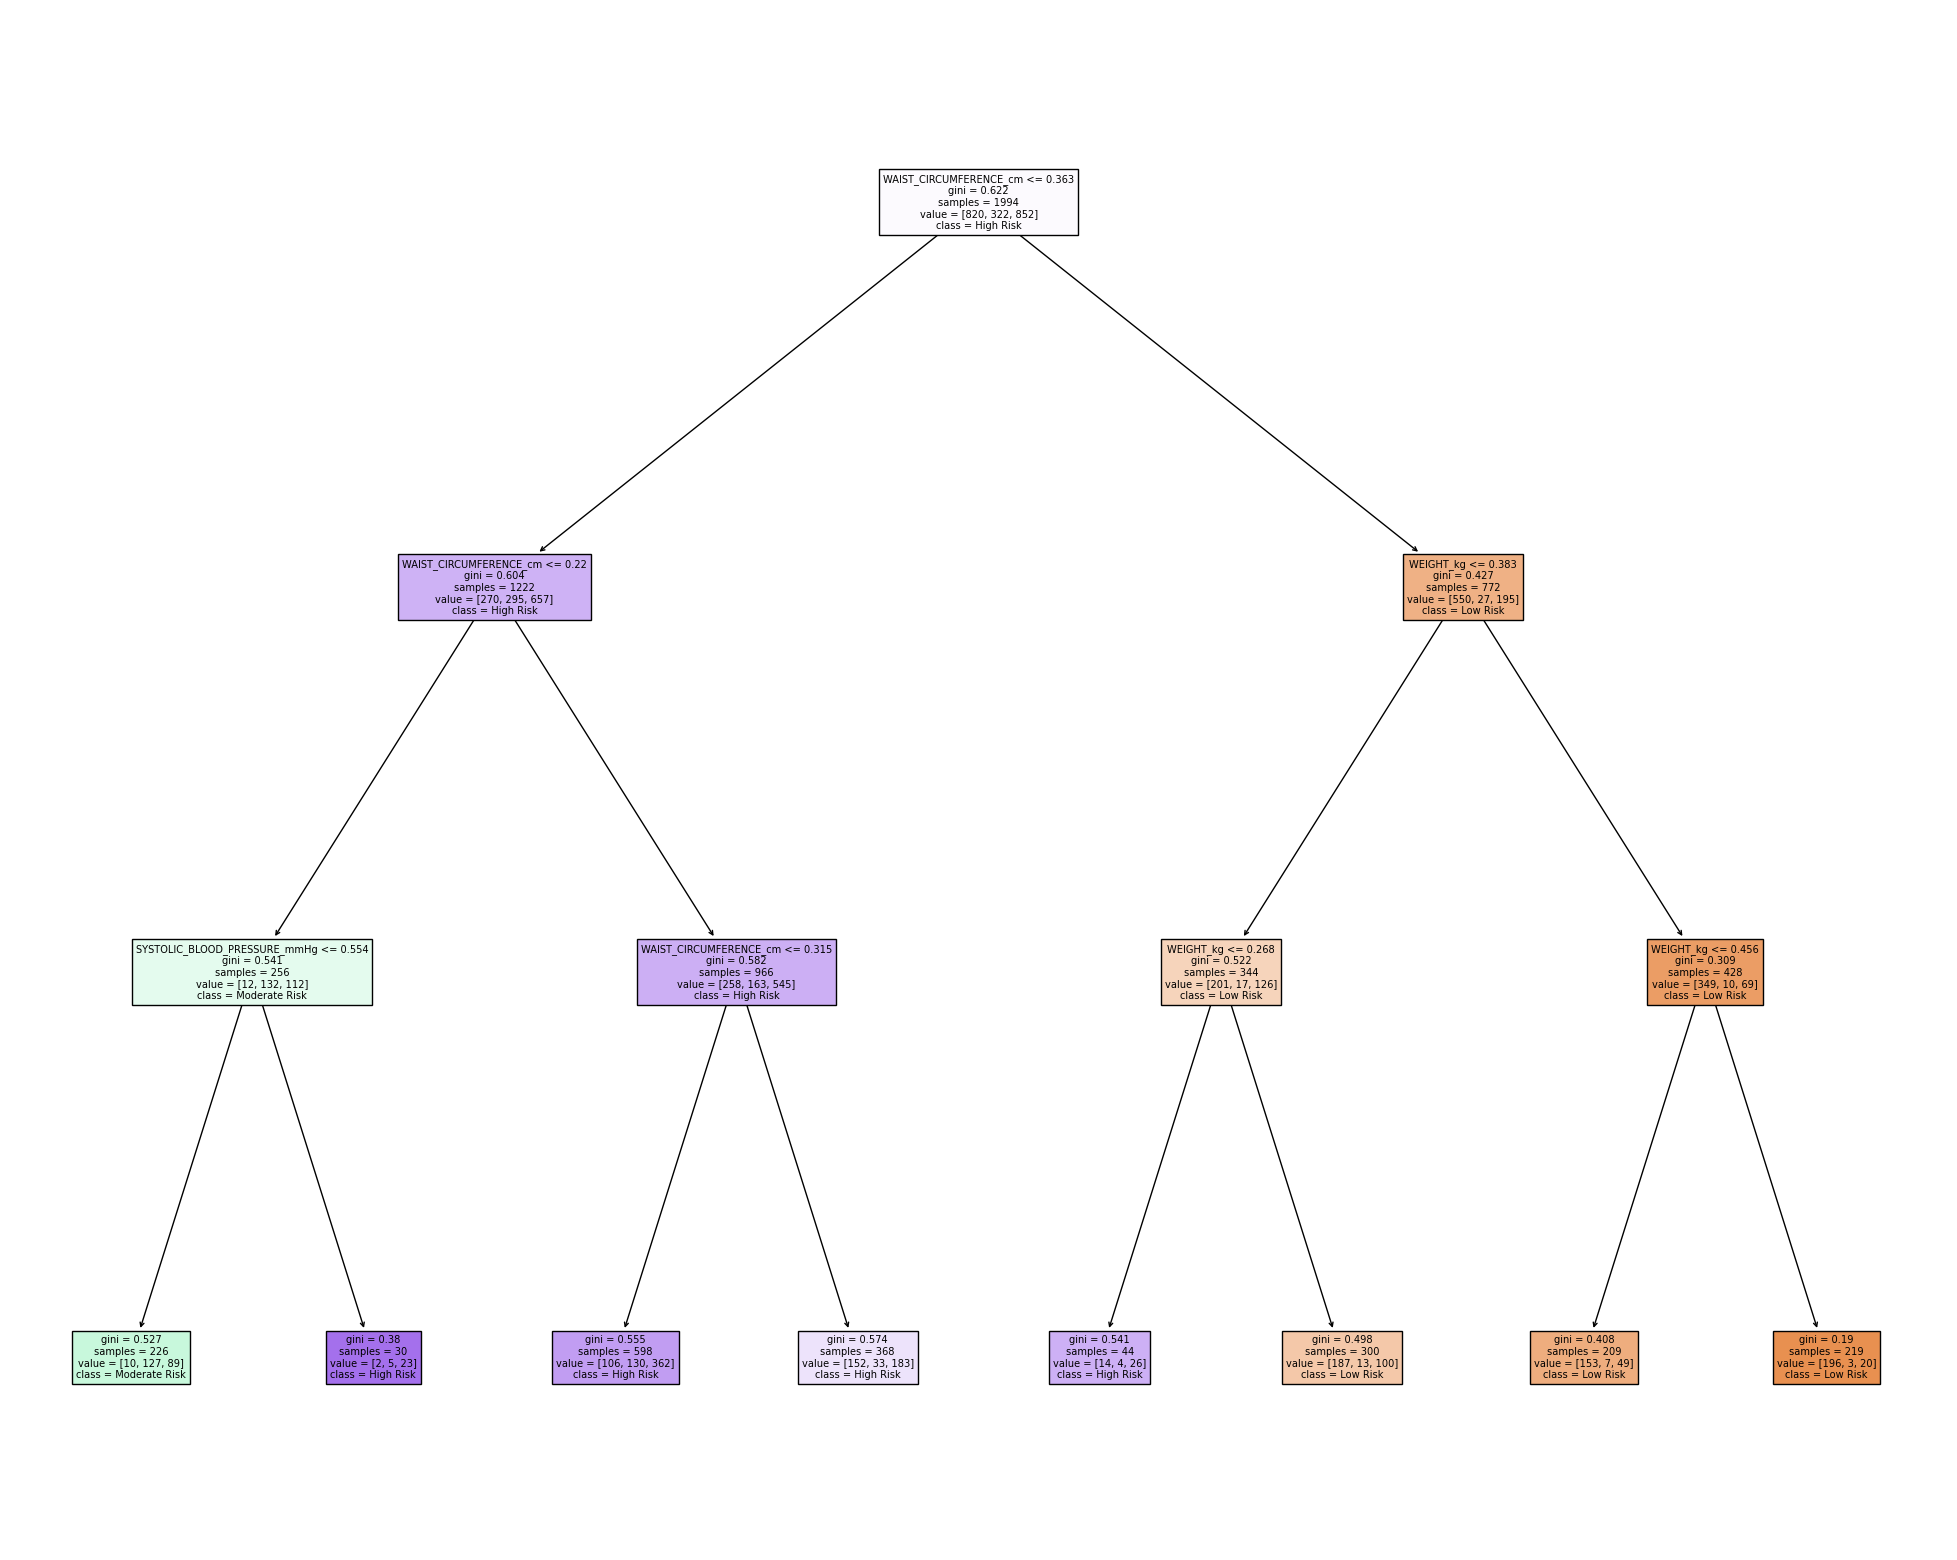

In [ ]:
#Plot Decision Tree
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=['AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WALK_DURATION_PER_DAY_MINUTES',
  'COMPUTER_USE_TIME_PER_DAY_HOURS','SMOKING_STATUS','CIGARETTES_CONSUMED_PER_DAY'],
                   class_names=['Low Risk','Moderate Risk','High Risk'],
                   filled=True)


Text(0.5, 23.52222222222222, 'Predicted label')

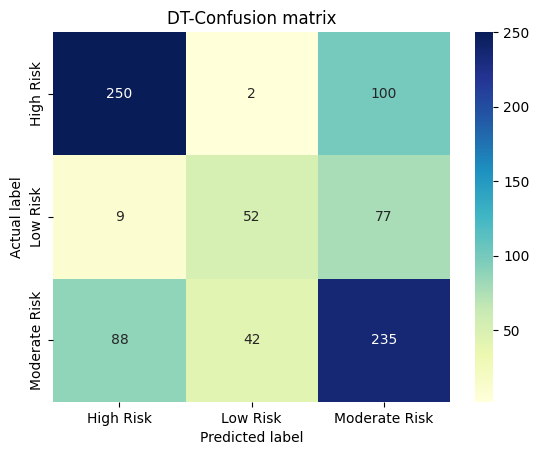

In [ ]:
#Confusion Matrix for Decision Tree
cnf_dt=confusion_matrix(y_test, y_pred_dt)

#Plot Confusion Matrix for DT
import matplotlib.pyplot as plt
import seaborn as sns
# create heatmap
sns.heatmap(pd.DataFrame(cnf_dt,index=['High Risk','Low Risk','Moderate Risk'],columns=['High Risk','Low Risk','Moderate Risk']),
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('DT-Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Decision tree Metrics Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
targets = ['Low Risk','Moderate Risk','High Risk']
print(classification_report(y_test, y_pred_dt, target_names=targets))
dt_auc=roc_auc_score(y_test,y_pred_dt_proba,multi_class="ovr")
print("ROC_AUC_SCORE:",dt_auc)

               precision    recall  f1-score   support

     Low Risk       0.72      0.71      0.72       352
Moderate Risk       0.54      0.38      0.44       138
    High Risk       0.57      0.64      0.60       365

     accuracy                           0.63       855
    macro avg       0.61      0.58      0.59       855
 weighted avg       0.63      0.63      0.62       855

ROC_AUC_SCORE: 0.767126328292634


**ANN (MLP CLASSIFIER)**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), activation='tanh', solver='adam', max_iter=500,random_state=1)
mlp.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_mlp = mlp.predict(X_test)

#Predict the probability of class for test dataset
y_pred_mlp_proba=mlp.predict_proba(X_test)

In [ ]:
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score
MLP_score = accuracy_score(y_test, y_pred_mlp)
print("Accuracy score (MLP): ", MLP_score)

Accuracy score (MLP):  0.6385964912280702


Text(0.5, 23.52222222222222, 'Predicted label')

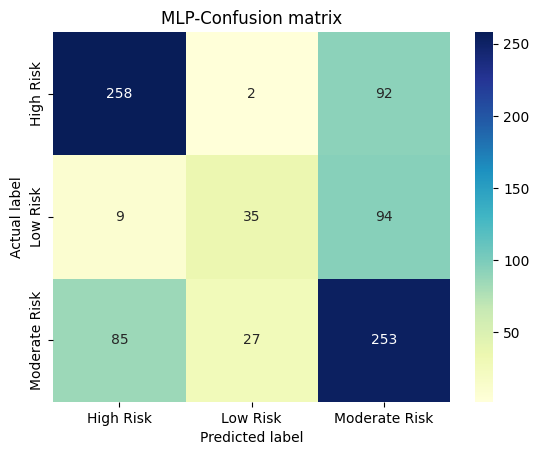

In [ ]:
#Confusion Matrix for MLP
cnf_mlp=confusion_matrix(y_test,y_pred_mlp)

# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mlp,index=['High Risk','Low Risk','Moderate Risk'],columns=['High Risk','Low Risk','Moderate Risk']),
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('MLP-Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_mlp))
mlp_auc=roc_auc_score(y_test,y_pred_mlp_proba,multi_class="ovr")
print("ROC_AUC_SCORE:",mlp_auc)

               precision    recall  f1-score   support

    High Risk       0.73      0.73      0.73       352
     Low Risk       0.55      0.25      0.35       138
Moderate Risk       0.58      0.69      0.63       365

     accuracy                           0.64       855
    macro avg       0.62      0.56      0.57       855
 weighted avg       0.64      0.64      0.63       855

ROC_AUC_SCORE: 0.797976909060262


In [ ]:
#Compare metrics for KNN,NAIVEBAYES,DECISION TREE AND MLP models
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
print(classification_report(y_test, y_pred_knn))  # knn classification report
print(classification_report(y_test, y_pred_nb))  # nb classification report
print(classification_report(y_test, y_pred_dt))  # dt classification report
print(classification_report(y_test, y_pred_mlp))  # dt classification report

               precision    recall  f1-score   support

    High Risk       0.68      0.71      0.69       352
     Low Risk       0.54      0.14      0.23       138
Moderate Risk       0.55      0.68      0.61       365

     accuracy                           0.60       855
    macro avg       0.59      0.51      0.51       855
 weighted avg       0.60      0.60      0.58       855

               precision    recall  f1-score   support

    High Risk       0.77      0.65      0.71       352
     Low Risk       0.53      0.48      0.50       138
Moderate Risk       0.57      0.67      0.62       365

     accuracy                           0.63       855
    macro avg       0.62      0.60      0.61       855
 weighted avg       0.65      0.63      0.64       855

               precision    recall  f1-score   support

    High Risk       0.72      0.71      0.72       352
     Low Risk       0.54      0.38      0.44       138
Moderate Risk       0.57      0.64      0.60       365

  

**HYPERPARAMETER TUNING USING GRIDSEARCHCV FOR MLP (BEST MODEL)**

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(11,),(10,20),(20,30,40)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=5), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 0.641
Test Accuracy : 0.633
Best Accuracy Through Grid Search : 0.626
Best Parameters :  {'activation': 'relu', 'hidden_layer_sizes': (10, 20), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
CPU times: user 7.89 s, sys: 618 ms, total: 8.51 s
Wall time: 10min 57s


In [ ]:
#Fit the algorithm using Best Parameters
mlp = MLPClassifier(hidden_layer_sizes=(10, 20), activation='relu', solver='adam',learning_rate='constant', max_iter=500,random_state=579)
mlp.fit(X_train,y_train)
pred_test_mlp_tune = mlp.predict(X_test)
pred_test_mlp_tune_proba=mlp.predict_proba(X_test)
print(accuracy_score(y_test, pred_test_mlp_tune))

0.6479532163742691


Text(0.5, 23.52222222222222, 'Predicted label')

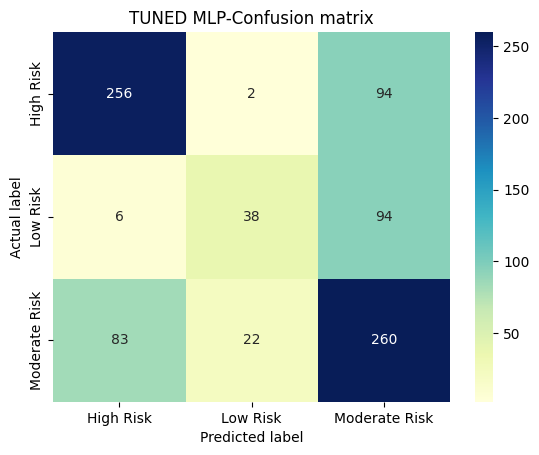

In [ ]:
#Comfusion Matrix After Tuning
cnf_mlp_tuned=confusion_matrix(y_test,pred_test_mlp_tune)
cnf_mlp_tuned

# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mlp_tuned,index=['High Risk','Low Risk','Moderate Risk'],columns=['High Risk','Low Risk','Moderate Risk']),
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('TUNED MLP-Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Metrics after tuning the alogrithm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test_mlp_tune))
mlp_auc_tuned=roc_auc_score(y_test,pred_test_mlp_tune_proba,multi_class="ovr")
print("ROC_AUC_SCORE:",mlp_auc_tuned)

               precision    recall  f1-score   support

    High Risk       0.74      0.73      0.73       352
     Low Risk       0.61      0.28      0.38       138
Moderate Risk       0.58      0.71      0.64       365

     accuracy                           0.65       855
    macro avg       0.65      0.57      0.58       855
 weighted avg       0.65      0.65      0.64       855

ROC_AUC_SCORE: 0.7994535087971811
